In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Rosenbrock function

In [2]:
def rosenbrock(X, Y):
    return 100*(X**2 - Y)**2 + (1 - X)**2

In [3]:
x = np.arange(-3, 3, 0.01)
y = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

### Contour Plot

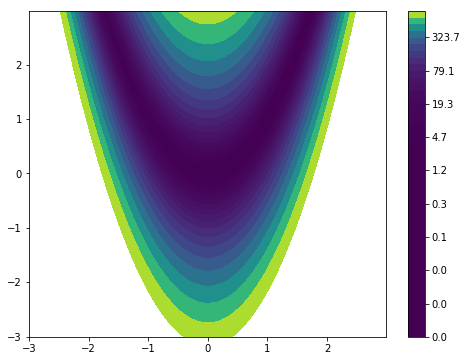

In [4]:
plt.figure(figsize=(8, 6))
CS = plt.contourf(X, Y, Z, np.logspace(-3, 3, 50))
cbar = plt.colorbar(CS)
plt.show()

# Simulated Annealing

In [5]:
class simulatedAnnealing(object):
    
    def __init__(self, temp, delTemp, freezPoint):
        self.temp = temp
        self.delTemp = delTemp
        self.freezPoint = freezPoint
        self.X = np.random.uniform(low=-2.78, high=2.78, size=2)
        
    def minFunction(self, X):
        return X[0]**2 + X[1]**2
    
    def prob(self, delF):
        return np.exp(-delF/self.temp)
    
    def randDels(self):
        return (np.random.random_sample(2) - 0.5)
    
    def inrange(self, X):
        if X[0] < 2.78 and X[0] > -2.78 and X[1] < 2.78 and X[1] > -2.78:
            return True
        else:
            return False
                
    def move(self):
        probs = []
        while(self.temp > self.freezPoint):
            n = 50
            self.probX = self.X
            self.minX = self.X
            while(n>0):
                delX = self.randDels()
                newX = self.probX + delX
                newVal = self.minFunction(newX)
                oldVal = self.minFunction(self.probX)
                if newVal < oldVal and self.inrange(newX):
                    self.probX = newX
                    self.minX = newX
                    #print(self.X, self.minFunction(self.X))
                else:
                    probab = self.prob(newVal - oldVal)
                    if probab > 0.6 and self.inrange(newX):
                        self.probX = newX
                        #print(self.X, self.minFunction(self.X), probab)
                        #print(self.X, self.minFunction(self.X), probab)
                n -= 1
            probs.append(self.prob(self.minFunction(self.X) - self.minFunction(self.minX)))
            self.X = self.minX
            self.temp -= self.delTemp
        return probs
            
            
    def results(self):
        return self.X, self.minFunction(self.X)

In [22]:
an = simulatedAnnealing(temp=100, delTemp=0.05, freezPoint=0.01)

In [23]:
probs = an.move()

In [24]:
an.results()

(array([ 0.15535296,  0.02141338]), 0.024593075247909178)

(0, 5)

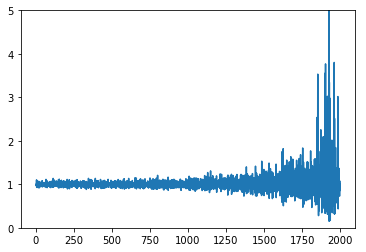

In [25]:
plt.plot(probs)
plt.ylim((0, 5))

In [21]:
avg = 0.0
for i in range(0, 30):
    an = simulatedAnnealing(temp=100, delTemp=0.05, freezPoint=0.01)
    probs = an.move()
    vals, res = an.results()
    avg += res
    print("Iteration ", i, " : Result: ", res)
print(avg/30)

Iteration  0  : Result:  0.000256616466006
Iteration  1  : Result:  0.00189069139771
Iteration  2  : Result:  0.00654087225257
Iteration  3  : Result:  0.0113349130183
Iteration  4  : Result:  0.00383715765708
Iteration  5  : Result:  0.000115302472756
Iteration  6  : Result:  0.0034831864613
Iteration  7  : Result:  0.00609616563882
Iteration  8  : Result:  3.7754845501e-05
Iteration  9  : Result:  0.00496556138535
Iteration  10  : Result:  0.000396707426574
Iteration  11  : Result:  0.0432914181377
Iteration  12  : Result:  0.0124824867858
Iteration  13  : Result:  0.02251655948
Iteration  14  : Result:  0.00118262816998
Iteration  15  : Result:  0.00228865828484
Iteration  16  : Result:  0.00288956136329
Iteration  17  : Result:  0.0292248532247
Iteration  18  : Result:  0.0178005808249
Iteration  19  : Result:  0.00733640392328
Iteration  20  : Result:  0.000622531014128
Iteration  21  : Result:  0.0332940857673
Iteration  22  : Result:  0.000231829616255
Iteration  23  : Result:  